In [1]:
import tensorflow as tf
import sys
sys.path.append('../../')

from data_loader.kitty_road_data_loader import KittyRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.fcn_alexnet_trainer import FcnAlexnetTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

print(os.path.dirname(os.path.abspath('__file__')))

C:\Users\TT260256\My Project\Sematic-Segmentation\work_supervision\28062019


In [2]:
json_file = "./fcn_alexnet_KittyRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)
data = KittyRoadLoader(config)

batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittyroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittyroad
image_size:
- 320
- 480
learning_rate: 0.00023949513325777832
max_to_keep: 5
num_epochs: 30
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittyroad\summary/

Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


In [3]:
latest_checkpoint = tf.train.latest_checkpoint(config.checkpoint_dir)
latest_checkpoint

'./experiments\\fcn_alexnet_kittyroad\\checkpoint/-3030'

In [ ]:
# new_model.save_weights(latest_checkpoint)
# new_model = FcnAlexnetModel(config)
# new_model.load_weights(latest_checkpoint)

In [4]:
sess = tf.Session() 

new_saver = tf.train.import_meta_graph("./experiments/fcn_alexnet_kittyroad/checkpoint/-3030.meta")
new_saver.restore(sess,latest_checkpoint)
print("Model Loaded")

INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittyroad\checkpoint/-3030
Model Loaded


In [5]:
graph =  tf.get_default_graph()
for op in graph.get_operations() :
    print(op.name)

init
global_step/global_step/initial_value
global_step/global_step
global_step/global_step/Assign
global_step/global_step/read
cur_epoch/cur_epoch/initial_value
cur_epoch/cur_epoch
cur_epoch/cur_epoch/Assign
cur_epoch/cur_epoch/read
cur_epoch/add/y
cur_epoch/add
cur_epoch/Assign
save/Const
save/SaveV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2
save/control_dependency
save/RestoreV2/tensor_names
save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/restore_all
Placeholder
inputs/X
inputs/y
conv_0/kernel/Initializer/random_uniform/shape
conv_0/kernel/Initializer/random_uniform/min
conv_0/kernel/Initializer/random_uniform/max
conv_0/kernel/Initializer/random_uniform/RandomUniform
conv_0/kernel/Initializer/random_uniform/sub
conv_0/kernel/Initializer/random_uniform/mul
conv_0/kernel/Initializer/random_uniform
conv_0/kernel
conv_0/kernel/Assign
conv_0/kernel/read
conv_0/bias/Initializer/zeros
conv_0/bias
conv_0/bias/Assign
conv_0/bias/read
conv_0/dilation_

loss/gradients/conv_6/BiasAdd_grad/BiasAddGrad
loss/gradients/conv_6/BiasAdd_grad/tuple/group_deps
loss/gradients/conv_6/BiasAdd_grad/tuple/control_dependency
loss/gradients/conv_6/BiasAdd_grad/tuple/control_dependency_1
loss/gradients/conv_6/Conv2D_grad/ShapeN
loss/gradients/conv_6/Conv2D_grad/Conv2DBackpropInput
loss/gradients/conv_6/Conv2D_grad/Conv2DBackpropFilter
loss/gradients/conv_6/Conv2D_grad/tuple/group_deps
loss/gradients/conv_6/Conv2D_grad/tuple/control_dependency
loss/gradients/conv_6/Conv2D_grad/tuple/control_dependency_1
loss/gradients/conv_5/Relu_grad/ReluGrad
loss/gradients/conv_5/BiasAdd_grad/BiasAddGrad
loss/gradients/conv_5/BiasAdd_grad/tuple/group_deps
loss/gradients/conv_5/BiasAdd_grad/tuple/control_dependency
loss/gradients/conv_5/BiasAdd_grad/tuple/control_dependency_1
loss/gradients/conv_5/Conv2D_grad/ShapeN
loss/gradients/conv_5/Conv2D_grad/Conv2DBackpropInput
loss/gradients/conv_5/Conv2D_grad/Conv2DBackpropFilter
loss/gradients/conv_5/Conv2D_grad/tuple/group_

conv_5/bias/Adam_1
conv_5/bias/Adam_1/Assign
conv_5/bias/Adam_1/read
conv_6/kernel/Adam/Initializer/zeros/shape_as_tensor
conv_6/kernel/Adam/Initializer/zeros/Const
conv_6/kernel/Adam/Initializer/zeros
conv_6/kernel/Adam
conv_6/kernel/Adam/Assign
conv_6/kernel/Adam/read
conv_6/kernel/Adam_1/Initializer/zeros/shape_as_tensor
conv_6/kernel/Adam_1/Initializer/zeros/Const
conv_6/kernel/Adam_1/Initializer/zeros
conv_6/kernel/Adam_1
conv_6/kernel/Adam_1/Assign
conv_6/kernel/Adam_1/read
conv_6/bias/Adam/Initializer/zeros/shape_as_tensor
conv_6/bias/Adam/Initializer/zeros/Const
conv_6/bias/Adam/Initializer/zeros
conv_6/bias/Adam
conv_6/bias/Adam/Assign
conv_6/bias/Adam/read
conv_6/bias/Adam_1/Initializer/zeros/shape_as_tensor
conv_6/bias/Adam_1/Initializer/zeros/Const
conv_6/bias/Adam_1/Initializer/zeros
conv_6/bias/Adam_1
conv_6/bias/Adam_1/Assign
conv_6/bias/Adam_1/read
conv7/kernel/Adam/Initializer/zeros/shape_as_tensor
conv7/kernel/Adam/Initializer/zeros/Const
conv7/kernel/Adam/Initializer

In [ ]:

# # create the model
# model = FcnAlexnetModel(config)
# sess = tf.Session()
# # create tensorboard logger
# logger = Logger(sess, config)
# # create trainer and pass all the previous components to it
# trainer = FcnAlexnetTrainer(sess, model, data, config, logger)
# #load model if exists
# model.load(sess)


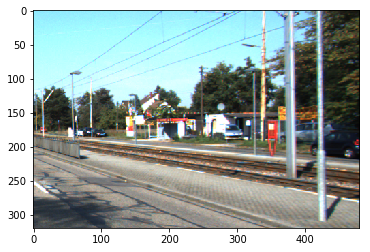

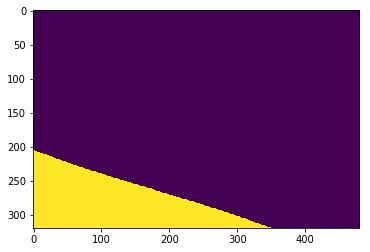

I want to predict sth...


In [6]:
img, mask = data.get_data_element("all_data",703)
plt.imshow(img)
plt.show()
plt.imshow(mask)
plt.show()
#predict
print("I want to predict sth...")

In [7]:
y_proba = graph.get_tensor_by_name("output/y_proba:0")

In [8]:
X = graph.get_tensor_by_name("inputs/X:0")

In [11]:
init=tf.global_variables_initializer()
sess.run(init)
Z = sess.run(
            y_proba,
            feed_dict = {X: [img]})

C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  after removing the cwd from sys.path.
C:\Users\TT260256\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


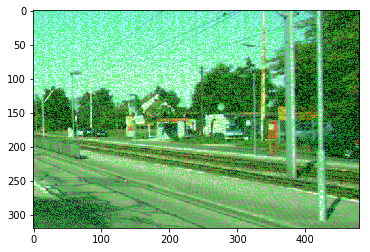

In [17]:
import scipy
segmentation = np.argmax(Z,axis=1).reshape(320,480,1)
mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
mask = scipy.misc.toimage(mask, mode="RGBA")
street_im = scipy.misc.toimage(img)
street_im.paste(mask, box=None, mask=mask)
plt.imshow(street_im)
plt.show()  


In [ ]:
# X_real,y_real = data.get_data_element("all_data",500)
# import scipy
# saver = tf.train.import_meta_graph("./experiments/fcn_alexnet_kittyroad/checkpoint/-3030.meta")
# with tf.Session() as sess : 
#     latest_checkpoint = tf.train.latest_checkpoint(config.checkpoint_dir)
#     if latest_checkpoint:
#         print("Loading model checkpoint {} ...\n".format(latest_checkpoint))
#         saver.restore(sess, latest_checkpoint)
#         print("Model loaded")
#     im_pred = sess.run(
#             y_proba,
#             feed_dict = {X: X_real})
    
#     im_softmax = im_pred.reshape((-1,320*480,2))
# #     print(im_softmax.shape)
# #     print(im_pred.shape)
#     Z = y_proba.eval(feed_dict = {X : [X_real]})
#     y_pred = np.argmax(Z,axis=1).reshape(320,480)
#     print(y_pred)    
#     plt.imshow(X_real)
#     plt.show()
#     plt.imshow(y_real)
#     plt.show()
#     plt.imshow(y_pred)
#     plt.show()
# #     for i in range(im_softmax.shape[0]) : 
# #         im = im_softmax[i][:, 1].reshape(320, 480)
# #         segmentation = (im > 0.5).reshape(320, 480, 1)
# #         mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
# #         mask = scipy.misc.toimage(mask, mode="RGBA")
# #         street_im = scipy.misc.toimage(X_real[i])
# #         street_im.paste(mask, box=None, mask=mask)
# #         plt.imshow(street_im)
# #         plt.show()  
# #     print( accuracy.eval(feed_dict={X: X_real, y: y_real}))